<a href="https://colab.research.google.com/github/pedrohortencio/Titanic-Kaggle/blob/master/Random_Forest_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kaggle Competition](https://www.kaggle.com/c/titanic)

In [1]:
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.93MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 61.2MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 38.1MB/s]


In [4]:
df_train = pd.read_csv('/content/train.csv', header=0, sep=',', 
                       quotechar='"',index_col="PassengerId")
df_test = pd.read_csv('/content/test.csv', header=0, sep=',',
                      quotechar='"', index_col="PassengerId")

In [5]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploratory Data Analysis

In [ ]:
# Distribution in the train dataset
print("Train Dataset\n")
print(df_train.Pclass.value_counts(dropna=False))  
print("--"*15)
print(df_train.Embarked.value_counts())
print("--"*15)
print(df_train.SibSp.value_counts())
print("--"*15)
print(df_train.Parch.value_counts())
print("--"*15)

Train Dataset

3    491
1    216
2    184
Name: Pclass, dtype: int64
------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
------------------------------


In [ ]:
# Distribution in the test dataset
print("Test Dataset\n")
print(df_test.Pclass.value_counts(dropna=False))  
print("--"*15)
print(df_test.Embarked.value_counts())
print("--"*15)
print(df_test.SibSp.value_counts())
print("--"*15)
print(df_test.Parch.value_counts())
print("--"*15)

Test Dataset

3    218
1    107
2     93
Name: Pclass, dtype: int64
------------------------------
S    270
C    102
Q     46
Name: Embarked, dtype: int64
------------------------------
0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64
------------------------------
0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64
------------------------------


In [ ]:
# NaN values in train dataset
df_train.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [ ]:
# NaN values in test dataset
df_test.isnull().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

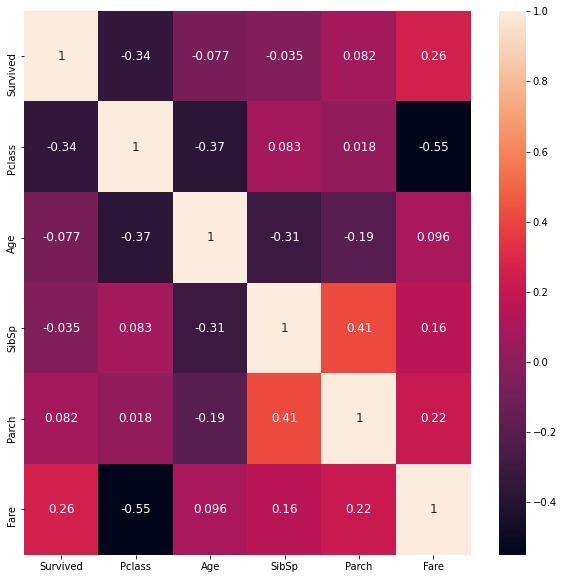

In [ ]:
#Analysing the correlation of features 

mat = df_train.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(mat, annot = True, annot_kws={'size': 12});

In [ ]:
print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Train dataset shape: (891, 11)
Test dataset shape: (418, 10)


Cabin Columns

In [ ]:
# Survival distribution where the Cabin is NaN
df_train[df_train['Cabin'].isnull()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

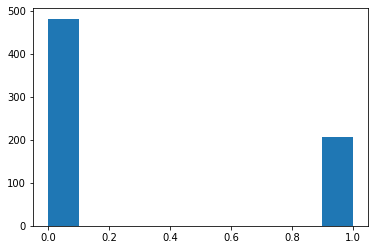

In [ ]:
# Survival distribution where the Cabin is NaN
df_train[df_train['Cabin'].isnull()]['Survived'].hist(grid=False)

In [ ]:
# Survival distribution where the Cabin isn't NaN
df_train[np.logical_not(df_train['Cabin'].isnull())]['Survived'].value_counts()

1    136
0     68
Name: Survived, dtype: int64

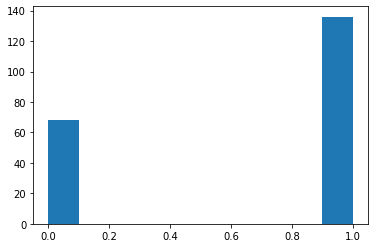

In [ ]:
# Survival distribution where the Cabin isn't NaN
df_train[np.logical_not(df_train['Cabin'].isnull())]['Survived'].hist(grid=False)

In [ ]:
# Unique values in the Cabin column
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# Creating a filter and applying it to the Cabin column.
    # 0 => Passenger has no cabin
    # 1 => Passenger has a cabin
is_there_a_cabin = df_train['Cabin'].isnull()
df_train.loc[is_there_a_cabin, 'Cabin'] = 0
df_train.loc[np.logical_not(is_there_a_cabin), 'Cabin'] = 1

In [ ]:
# Relation between cabin and survival 
df_train.groupby(['Cabin', 'Survived']).size()

Cabin  Survived
0      0           481
       1           206
1      0            68
       1           136
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


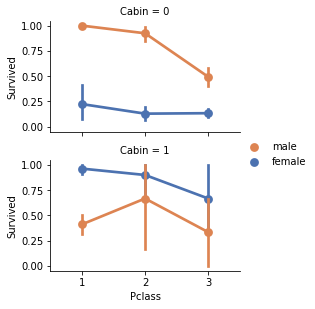

In [ ]:
# Seeing if there's a correlation between the Cabin and other informations 
grid = sns.FacetGrid(df_train, row='Cabin', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

The cabin column will be droped from the datasets. There's 327 missing values only in the training dataset and it doesn't seem to be a correlation between cabin and 

Extracting Title from the Name Column

In [ ]:
# Combining the two datasets for easier iteration
combined_datasets = [df_train, df_test]

In [ ]:
# Loop to iterate over the 2 datasets
for dataset in combined_datasets:
    # Extracting the title
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combined_datasets:
    # Combining less common titles under the category "Others"
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

    # Replacing misspelled words
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [ ]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [ ]:
# Mapping the titles into numeric values
title_dict_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
for dataset in combined_datasets:
    dataset['Title'] = dataset['Title'].map(title_dict_map)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1


In [ ]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


Fare Column

In [ ]:
# Checking which row is null in the Fare column 
df_test[df_test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [ ]:
# Filling the missing value in the test dataset
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)

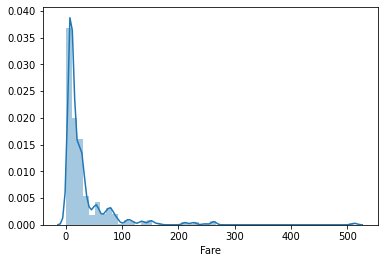

In [ ]:
sns.distplot(df_train['Fare']);

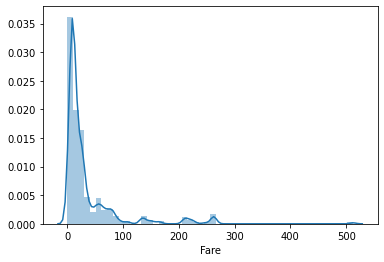

In [ ]:
sns.distplot(df_test['Fare']);

In [ ]:
# Statistical data about the "Fare" column
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# Making a log transformation in the Fare column:
df_train['Fare'] = df_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
df_test['Fare'] = df_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

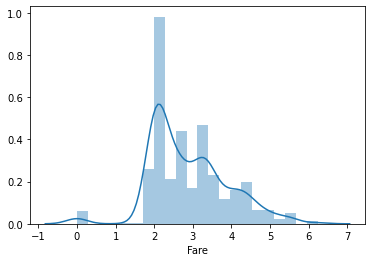

In [ ]:
sns.distplot(df_train['Fare']);

Embarked Column

In [ ]:
# Checking the rows that have null values in the Embarked column
df_train[df_train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,1,NaN,2
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,1,NaN,3


In [ ]:
# This will be filled with the mode (the most common value)
freq_embarked_port = df_train.Embarked.dropna().mode()[0]

for dataset in combined_datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_embarked_port)

In [ ]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
# As it seems that there's a correlation, this column will be kept. Converting to numeric:

for dataset in combined_datasets:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,1,1,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,0,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,1,0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,0,0,1


In [ ]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,2,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,0,3
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,2,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,0,3


Parch and SibSp columns

In [ ]:
# I'll create a new column (FamilyMembers) to see who is alone and how that correlates to the survival rate
for dataset in combined_datasets:
    dataset['FamilyMembers'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
df_train[['FamilyMembers', 'Survived']].groupby(['FamilyMembers'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilyMembers,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# Simplifying it creating a column "IsAlone"for dataset in combine:
for dataset in combined_datasets:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilyMembers'] == 1, 'IsAlone'] = 1

In [ ]:
df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'FamilyMembers', 'IsAlone'],
      dtype='object')

Sex Column

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#The correlation is strong. So I'll map into numeric values to use it in the ML algorithm
for dataset in combined_datasets:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,IsAlone
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,0,0,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,1,1,3,2,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,0,0,2,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,1,0,3,2,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,0,0,1,1,1


In [ ]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyMembers,IsAlone
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,2.057860,NaN,2,1,1,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,1.945910,NaN,0,3,2,0
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,2.270836,NaN,2,1,1,1
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,2.159003,NaN,0,1,1,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,2.508582,NaN,0,3,3,0


Data Imputation on Age Column using SVR

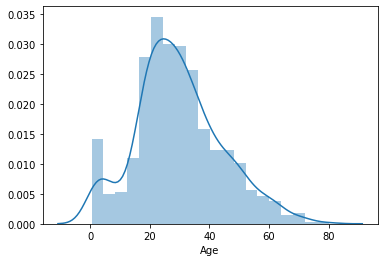

In [ ]:
sns.distplot(df_train['Age']);

In [ ]:
from sklearn.svm import SVR

In [ ]:
is_age_missing_train = df_train['Age'].isnull()
is_age_missing_test = df_test['Age'].isnull()

In [ ]:
columns_svr = ['Pclass', 'Sex', 'Fare', 'Embarked', 'Title', 'FamilyMembers', 'IsAlone']

In [ ]:
df_train['Age_Imputed'] = is_age_missing_train.astype('int')
df_test['Age_Imputed'] = is_age_missing_test.astype('int')

In [ ]:
svr_imputor = SVR(cache_size=2000)

In [ ]:
X_train_svr = df_train.loc[np.logical_not(is_age_missing_train), columns_svr]
y_train_svr = df_train.loc[np.logical_not(is_age_missing_train), 'Age']

In [ ]:
svr_imputor.fit(X_train_svr, y_train_svr)

SVR(C=1.0, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
X_prod_train_svr = df_train.loc[is_age_missing_train, columns_svr]
y_prod_train_svr = svr_imputor.predict(X_prod_train_svr)
df_train.loc[is_age_missing_train, 'Age'] = y_prod_train_svr

In [ ]:
X_prod_test_svr = df_test.loc[is_age_missing_test, columns_svr]
y_prod_test_svr = svr_imputor.predict(X_prod_test_svr)
df_test.loc[is_age_missing_test, 'Age'] = y_prod_test_svr

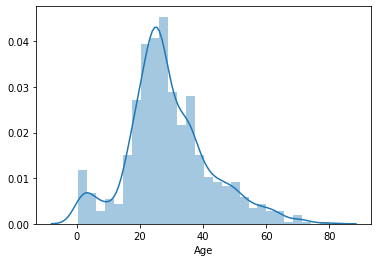

In [ ]:
sns.distplot(df_train['Age']);

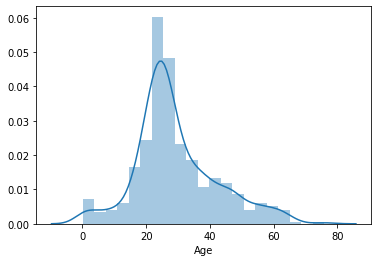

In [ ]:
sns.distplot(df_test['Age']);

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

Age_Imputed      0
IsAlone          0
FamilyMembers    0
Title            0
Embarked         0
Cabin            0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
dtype: int64

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

Cabin            327
Age_Imputed        0
IsAlone            0
FamilyMembers      0
Title              0
Embarked           0
Fare               0
Ticket             0
Parch              0
SibSp              0
Age                0
Sex                0
Name               0
Pclass             0
dtype: int64

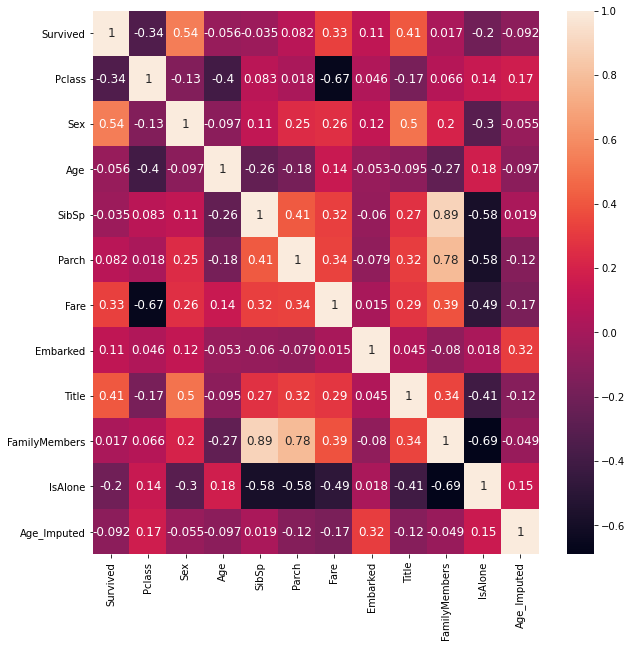

In [ ]:
#Analysing the correlation of features again

mat2 = df_train.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(mat2, annot = True, annot_kws={'size': 12});

Dropping columns

In [ ]:
columns_to_drop = ['Cabin', 'FamilyMembers', 'Ticket', 'Parch', 'SibSp', 'Name']

In [ ]:
for dataset in combined_datasets:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Imputed
PassengerId,,,,,,,,,
1,0,3,0,22.0,1.981001,0,1,0,0
2,1,1,1,38.0,4.266662,1,3,0,0
3,1,3,1,26.0,2.070022,0,2,1,0
4,1,1,1,35.0,3.972177,0,3,0,0
5,0,3,0,35.0,2.085672,0,1,1,0


In [ ]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Imputed
PassengerId,,,,,,,,
892,3,0,34.5,2.057860,2,1,1,0
893,3,1,47.0,1.945910,0,3,0,0
894,2,0,62.0,2.270836,2,1,1,0
895,3,0,27.0,2.159003,0,1,1,0
896,3,1,22.0,2.508582,0,3,0,0


In [ ]:
df_train[['Age_Imputed', 'Survived']].groupby(['Age_Imputed'], as_index=False).mean()
# I'll mantain the information about the age data missing.

,Age_Imputed,Survived
0,0,0.406162
1,1,0.293785


Doing One-Hot-Encoding in the categorical columns (Sex, Embarked, Title, IsAlone)

In [ ]:
for dataset in combined_datasets:
    sex_dummies = pd.get_dummies(dataset.Sex, prefix='Sex')
    embarked_dummies = pd.get_dummies(dataset.Embarked, prefix='Embarked')
    #title_dummies = pd.get_dummies(dataset.Title, prefix='Title')
    #isalone_dummies = pd.get_dummies(dataset.IsAlone, prefix='IsAlone')

    dataset[sex_dummies.columns] = sex_dummies
    dataset[embarked_dummies.columns] = embarked_dummies
    #dataset[title_dummies.columns] = title_dummies
    #dataset[isalone_dummies.columns] = isalone_dummies

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Imputed,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1.981001,0,1,0,0,1,0,1,0,0
2,1,1,1,38.0,4.266662,1,3,0,0,0,1,0,1,0
3,1,3,1,26.0,2.070022,0,2,1,0,0,1,1,0,0
4,1,1,1,35.0,3.972177,0,3,0,0,0,1,1,0,0
5,0,3,0,35.0,2.085672,0,1,1,0,1,0,1,0,0


In [ ]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Imputed,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,
892,3,0,34.5,2.057860,2,1,1,0,1,0,0,0,1
893,3,1,47.0,1.945910,0,3,0,0,0,1,1,0,0
894,2,0,62.0,2.270836,2,1,1,0,1,0,0,0,1
895,3,0,27.0,2.159003,0,1,1,0,1,0,1,0,0
896,3,1,22.0,2.508582,0,3,0,0,0,1,1,0,0


In [ ]:
# Dropping the columns that I did the one-hot-encoding
#columns_to_drop2 = ['Sex', 'Embarked', 'Title', 'IsAlone']
columns_to_drop2 = ['Sex', 'Embarked', 'Age_Imputed']
for dataset in combined_datasets:
    dataset.drop(columns=columns_to_drop2, inplace=True)

In [ ]:
# Creating 2 new columns
for dataset in combined_datasets:
    dataset['AgeClass'] = dataset['Age']*dataset['Pclass']

In [ ]:
df_train.head()

,Survived,Pclass,Age,Fare,Title,IsAlone,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,AgeClass
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1.981001,1,0,1,0,1,0,0,66.0
2,1,1,38.0,4.266662,3,0,0,1,0,1,0,38.0
3,1,3,26.0,2.070022,2,1,0,1,1,0,0,78.0
4,1,1,35.0,3.972177,3,0,0,1,1,0,0,35.0
5,0,3,35.0,2.085672,1,1,1,0,1,0,0,105.0


In [ ]:
df_test.head()

,Pclass,Age,Fare,Title,IsAlone,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,AgeClass
PassengerId,,,,,,,,,,,
892,3,34.5,2.057860,1,1,1,0,0,0,1,103.5
893,3,47.0,1.945910,3,0,0,1,1,0,0,141.0
894,2,62.0,2.270836,1,1,1,0,0,0,1,124.0
895,3,27.0,2.159003,1,1,1,0,1,0,0,81.0
896,3,22.0,2.508582,3,0,0,1,1,0,0,66.0


Creating and training the Random Forest Classifier

In [ ]:
# Creating the ndarrays from the training dataset
y = df_train['Survived'].to_numpy()
X_not_norm = df_train.drop('Survived', axis=1).to_numpy()

In [ ]:
from sklearn.preprocessing import Normalizer

norm = Normalizer().fit(X_not_norm)

In [ ]:
#X = norm.transform(X_not_norm)
X = X_not_norm

In [ ]:
# Creating the train and validation datasets
(X_train, X_validation, 
 y_train, y_validation) = train_test_split(X, y, random_state=0)

Using GridSearchCV to search for best parameters.

In [ ]:
parameter = [{'n_estimators':[50, 100, 200, 250, 300],
              'criterion':['entropy'],
              'min_samples_leaf': [3, 4, 6],
              }]

classifier = GridSearchCV(RandomForestClassifier(), parameter,  cv=5, scoring='accuracy')
classifier.fit(X_train, y_train)

print(classifier.best_params_)
print(classifier.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 3, 'n_estimators': 300}
0.8323644933228593


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
yhat_validation = rfc.predict(X_validation)

In [ ]:
accuracy_score(yhat_validation, y_validation)

0.8475336322869955

As the model has a good accuracy, I'll retrain it with the full train dataset

In [ ]:
parameter = [{'n_estimators':[10, 25, 50, 75, 100],
              'criterion':['entropy'],
              'min_samples_leaf': [2, 3, 5],
              }]

classifier = GridSearchCV(RandomForestClassifier(), parameter,  cv=5, scoring='accuracy')
classifier.fit(X, y)

print(classifier.best_params_)
print(classifier.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 75}
0.8260498399347185


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=50)

In [ ]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Creating the csv file to Kaggle

In [ ]:
X_test_a = df_test.to_numpy()

In [ ]:
#X_test = norm.transform(X_test_a)
X_test = X_test_a

In [ ]:
y_pred = rfc.predict(X_test)
y_pred_formt = y_pred.astype('int64')

In [ ]:
df_test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test.index
submission['Survived'] = y_pred_formt
submission['Survived'].value_counts()



0    282
1    136
Name: Survived, dtype: int64

In [ ]:
submission2 = submission.copy()

In [ ]:
submission2 = submission2.set_index(submission['PassengerId'])
submission2.drop(columns='PassengerId', inplace=True)
submission2

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
filename = 'TitanicPredictions.csv'
submission2.to_csv(filename,index=True,header=["Survived"],index_label=["PassengerId"])
print('Saved file: ' + filename)

Saved file: TitanicPredictions.csv
